<a href="https://colab.research.google.com/github/pauljohn99/ML-learnings/blob/main/contourFromShape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

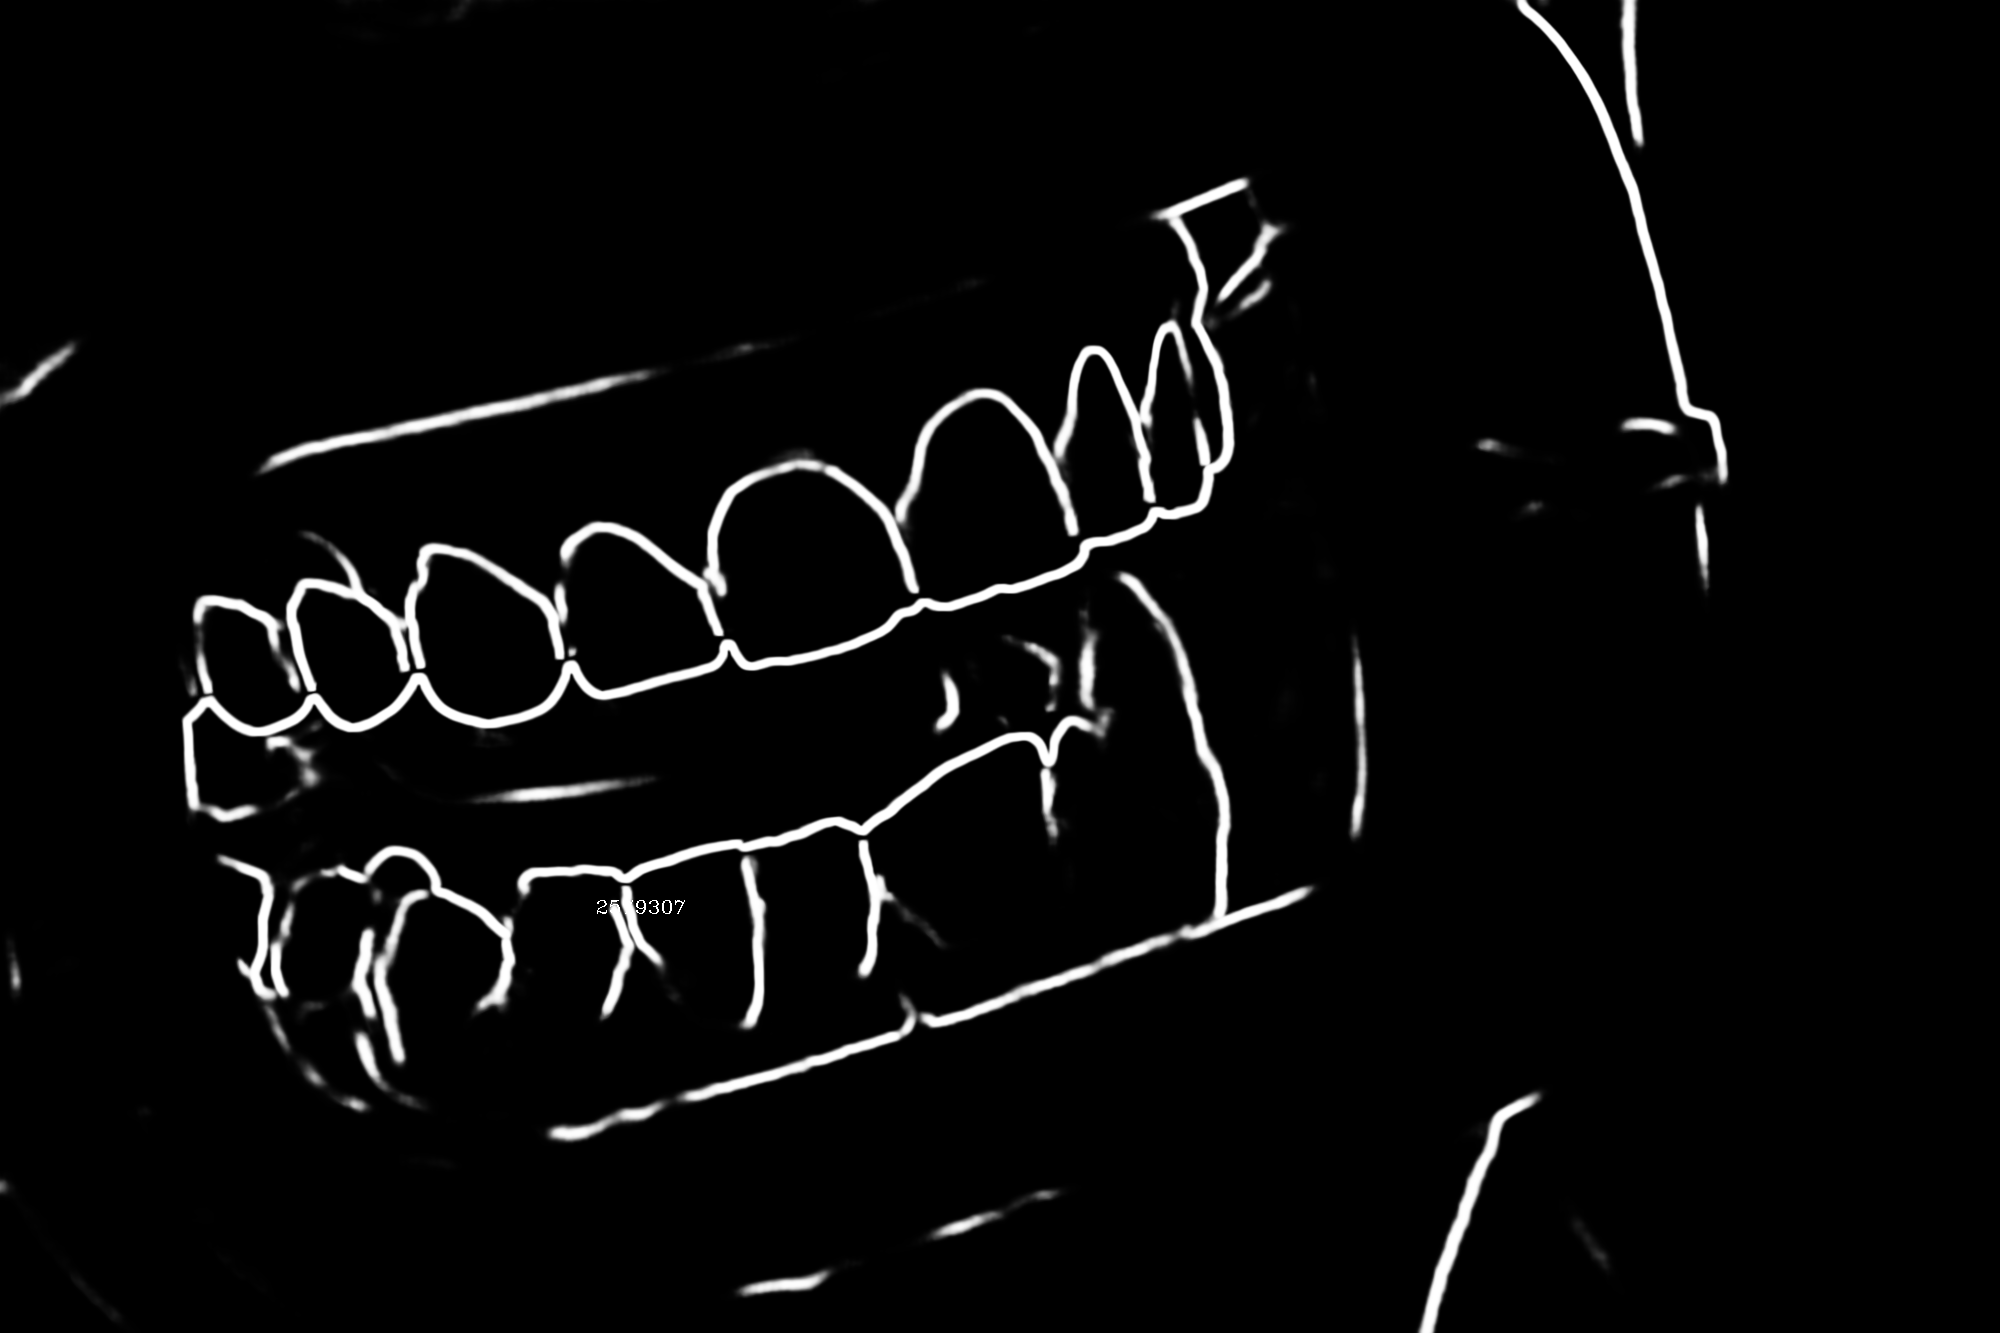

mask


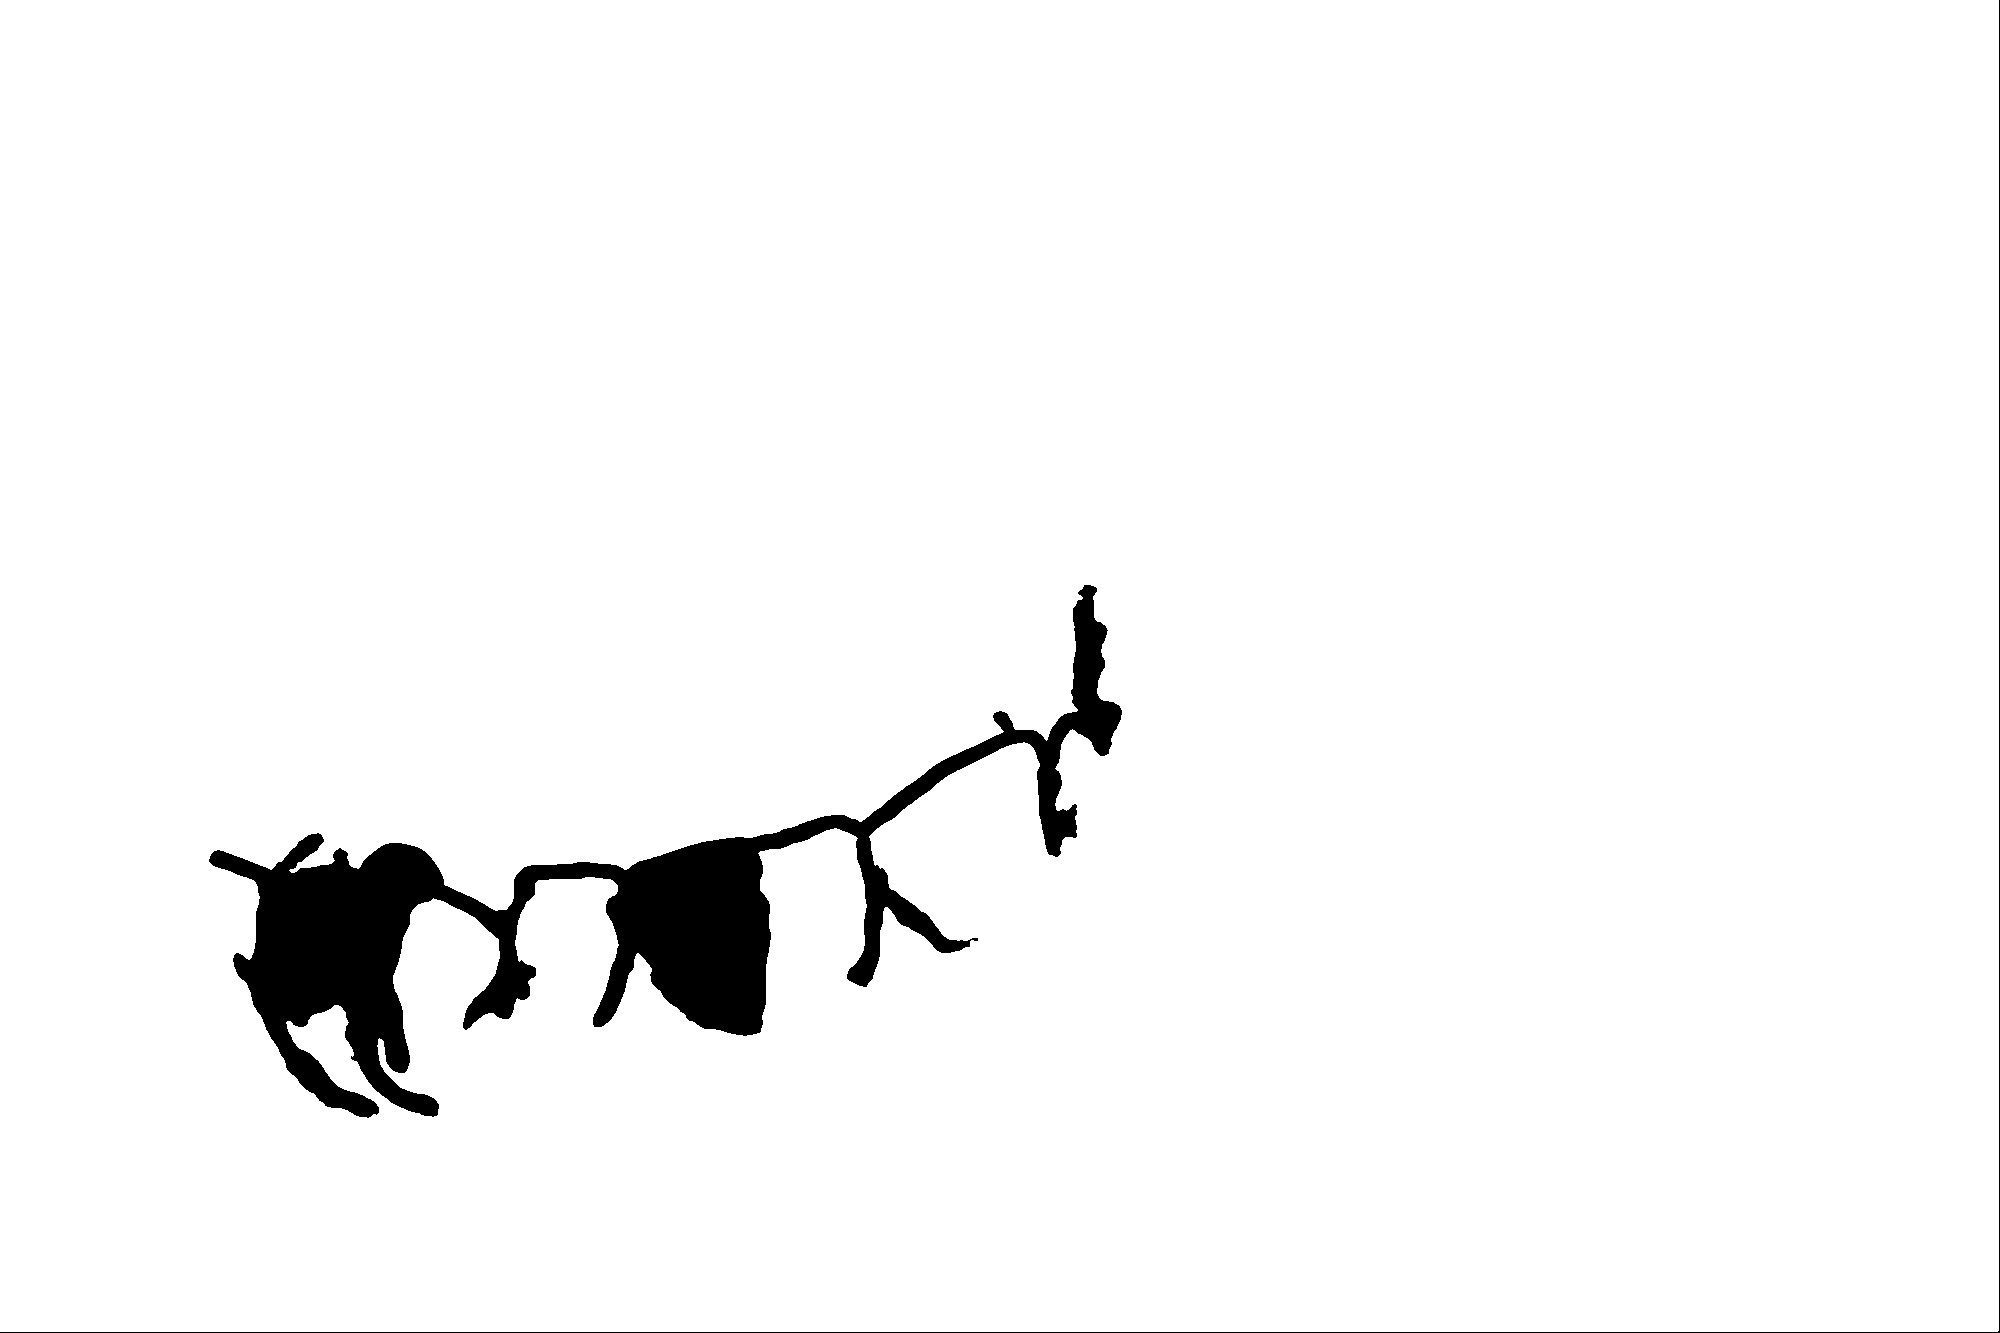

2579307


-1

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Input image
img = cv2.imread('/content/MicrosoftTeams-image (1).png', cv2.IMREAD_GRAYSCALE)

# Needed due to JPG artifacts
_, temp = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Dilate to better detect contours
temp = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

# Find largest contour
cnts, _ = cv2.findContours(temp, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
largestCnt = []
for cnt in cnts:
    if (len(cnt) > len(largestCnt)):
        largestCnt = cnt

# Determine center of area of largest contour
M = cv2.moments(largestCnt)
x = int(M["m10"] / M["m00"])
y = int(M["m01"] / M["m00"])

# Initiale mask for flood filling
width, height = temp.shape
mask = img2 = np.ones((width + 2, height + 2), np.uint8) * 255
mask[1:width, 1:height] = 0

# Generate intermediate image, draw largest contour, flood filled
temp = np.zeros(temp.shape, np.uint8)
temp = cv2.drawContours(temp, largestCnt, -1, 255, cv2.FILLED)
_, temp, mask, _ = cv2.floodFill(temp, mask, (x, y), 255)
temp = cv2.morphologyEx(temp, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

# Count pixels in desired region
area = cv2.countNonZero(temp)

# Put result on original image
img = cv2.putText(img, str(area), (x, y), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, 255)

cv2_imshow( img)
print("mask")
cv2_imshow( temp)
print(area)
cv2.waitKey(0)